In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.offline import iplot, plot
import warnings
from sklearn.preprocessing import LabelEncoder
from tableone import TableOne


In [2]:
# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('jobs_in_data.xlsx')
#We display some samples in our data for insuring that we're reqding the right dataset
df.sample(10)

work_year        job_title                    job_category  \
4195       2023   Data Scientist       Data Science and Research   
15         2023     Data Analyst                   Data Analysis   
6121       2023    Data Engineer                Data Engineering   
2843       2023     Data Analyst                   Data Analysis   
4133       2023    Data Engineer                Data Engineering   
5079       2023    Data Engineer                Data Engineering   
3170       2023  Data Strategist  Data Architecture and Modeling   
6484       2023   Data Scientist       Data Science and Research   
1850       2023    Data Engineer                Data Engineering   
7392       2023   Data Scientist       Data Science and Research   

     salary_currency  salary  salary_in_usd employee_residence  \
4195             USD  155000         155000      United States   
15               USD   95000          95000      United States   
6121             USD  146000         146000      United States   
2843             USD   95000          95000      United States   
4133             GBP   35000          43064     United Kingdom   
5079             USD  105000         105000      United States   
3170             USD  175000         175000      United States   
6484             USD  106250         106250      United States   
1850             USD  154000         154000      United States   
7392             USD  135000         135000      United States   

     experience_level employment_type work_setting company_location  \
4195           Senior       Full-time    In-person    United States   
15        Entry-level       Full-time    In-person    United States   
6121           Senior       Full-time    In-person    United States   
2843        Mid-level       Full-time       Remote    United States   
4133        Mid-level       Full-time       Remote   United Kingdom   
5079           Senior       Full-time    In-person    United States   
3170           Senior       Full-time       Remote    United States   
6484        Mid-level       Full-time    In-person    United States   
1850        Mid-level       Full-time    In-person    United States   
7392           Senior       Full-time       Remote    United States   

     company_size  
4195            M  
15              M  
6121            M  
2843            M  
4133            M  
5079            M  
3170            M  
6484            M  
1850            M  
7392            M

In [4]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [5]:
df_job_category_general = df['job_category'].value_counts()
df_job_category_general

print(f"Top Job Needed in Four Year'{df_job_category_general.idxmax()}' with Value '{df_job_category_general.max()}",)
print(f"Least Job Needed in Four Year'{df_job_category_general.idxmin()}' with Value '{df_job_category_general.min()}",)

iplot(
    px.bar(
        df_job_category_general,
        labels={'job_category': 'Job Category'},
        title=f'Needed of Job Category in 4 years ago',
        color_discrete_sequence=['#b3079c'],
        template='plotly_dark',
        text_auto=True
    )
)

Top Job Needed in Four Year'Data Science and Research' with Value '3014
Least Job Needed in Four Year'Cloud and Database' with Value '5


In [6]:
df.describe()

work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.519470   63608.835387   63177.372024
min    2020.000000   14000.000000   15000.000000
25%    2023.000000  105200.000000  105700.000000
50%    2023.000000  143860.000000  143000.000000
75%    2023.000000  187000.000000  186723.000000
max    2023.000000  450000.000000  450000.000000

In [7]:
import plotly.offline as pyo
import plotly.express as px

df_job_category = df.groupby('work_year')['job_category'].value_counts()

colors = ['#ccaa14','#8807b3','#07b324','#1007b3']

j=0

for i in range(2020,2024):
    fig = px.bar(
        df_job_category.get(i),
        labels={
            'job_category':'Job Category',
            'value':'Numbre of Employees'
        },title=f'Needed of Job Category in {i}',
        color_discrete_sequence=[colors[j]],
        template='plotly_dark',text_auto=True
    )
    pyo.iplot(fig)
    j+=1

print(j)

4


In [8]:
import plotly.offline as pyo
import plotly.express as px

df_job_category = df.groupby('work_year')['job_category'].value_counts()

colors = ['#ccaa14','#8807b3','#07b324','#1007b3']

j=0

for i in range(2020,2024):
    fig = px.bar(
        df_job_category.get(i),
        labels={
            'job_category':'Job Category',
            'value':'Numbre of Employees'
        },title=f'Needed of Job Category in {i}',
        color_discrete_sequence=[colors[j]],
        template='plotly_dark',text_auto=True
    )
    pyo.iplot(fig)
    j+=1

print(j)

4


<Axes: xlabel='work_year'>

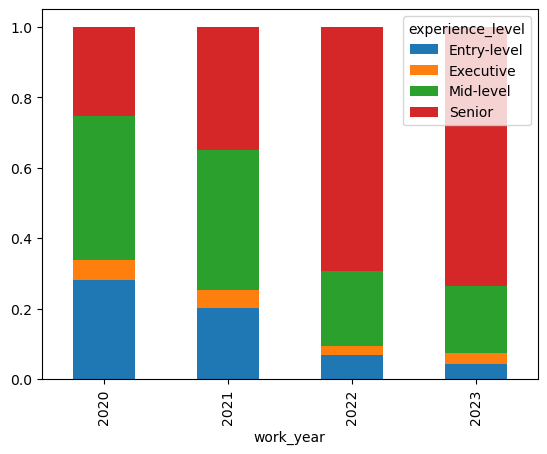

In [8]:
df.groupby('work_year')['experience_level'].value_counts(normalize=True).sort_values(ascending=True).unstack('experience_level').plot(kind = 'bar', stacked=True)

<Axes: >

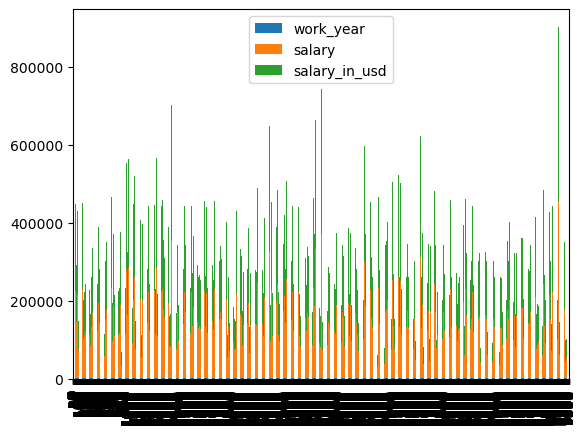

In [9]:
df.sort_index().plot(kind='bar', stacked=True)


In [10]:
top_5_countries = df[df['work_year']==2023]['company_location'].value_counts(normalize = True).head(5)
top_5_countries

company_location
United States     0.894002
United Kingdom    0.045619
Canada            0.023346
Spain             0.008721
Germany           0.003891
Name: proportion, dtype: float64

In [11]:
boxplot_dataframe = df[(df['work_year'] == 2023) & (df['company_location'].isin(top_5_countries.index))]
boxplot_dataframe

work_year                  job_title                    job_category  \
0          2023       Data DevOps Engineer                Data Engineering   
1          2023             Data Architect  Data Architecture and Modeling   
2          2023             Data Architect  Data Architecture and Modeling   
3          2023             Data Scientist       Data Science and Research   
4          2023             Data Scientist       Data Science and Research   
...         ...                        ...                             ...   
7492       2023  Machine Learning Engineer         Machine Learning and AI   
7493       2023             Data Scientist       Data Science and Research   
7494       2023             Data Scientist       Data Science and Research   
7495       2023              Data Engineer                Data Engineering   
7496       2023              Data Engineer                Data Engineering   

     salary_currency  salary  salary_in_usd employee_residence  \
0                EUR   88000          95012            Germany   
1                USD  186000         186000      United States   
2                USD   81800          81800      United States   
3                USD  212000         212000      United States   
4                USD   93300          93300      United States   
...              ...     ...            ...                ...   
7492             USD  134500         134500      United States   
7493             USD  130000         130000      United States   
7494             USD   90000          90000      United States   
7495             USD  160000         160000      United States   
7496             USD  135000         135000      United States   

     experience_level employment_type work_setting company_location  \
0           Mid-level       Full-time       Hybrid          Germany   
1              Senior       Full-time    In-person    United States   
2              Senior       Full-time    In-person    United States   
3              Senior       Full-time    In-person    United States   
4              Senior       Full-time    In-person    United States   
...               ...             ...          ...              ...   
7492           Senior       Full-time    In-person    United States   
7493        Mid-level       Full-time    In-person    United States   
7494        Mid-level       Full-time    In-person    United States   
7495      Entry-level       Full-time    In-person    United States   
7496      Entry-level       Full-time    In-person    United States   

     company_size  
0               L  
1               M  
2               M  
3               M  
4               M  
...           ...  
7492            L  
7493            M  
7494            M  
7495            M  
7496            M  

[7271 rows x 12 columns]

In [12]:
medians = boxplot_dataframe.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).index
medians

Index(['United States', 'Canada', 'Germany', 'United Kingdom', 'Spain'], dtype='object', name='company_location')

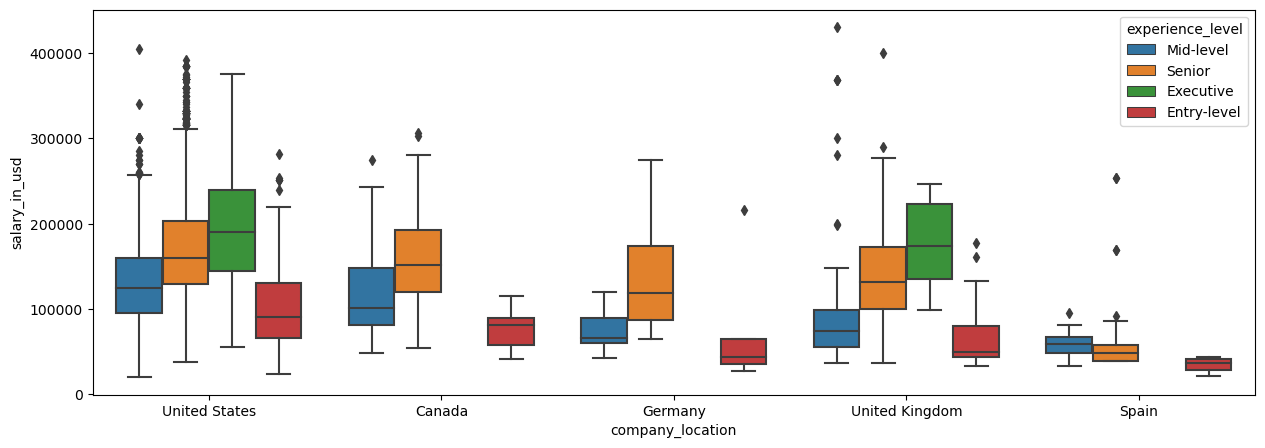

In [13]:
plt.figure(figsize=(15,5))

sns.boxplot(
    data = boxplot_dataframe,
    x = 'company_location',
    y = 'salary_in_usd',
    hue = 'experience_level',
    order = medians
)
plt.show()

In [14]:
level_order = ['Entry-level', 'Mid-level', 'Senior', 'Executive']
top_paid_USA = boxplot_dataframe[boxplot_dataframe['company_location']=="United States"]
mean_pay = top_paid_USA.groupby(['job_category','experience_level'])['salary_in_usd'].mean().unstack('experience_level')
mean_pay = mean_pay[level_order].sort_values(by = 'Senior', ascending = False)
mean_pay_k = mean_pay/1000
plot_order = mean_pay_k.index

In [15]:
encoder = LabelEncoder()

df['job_category'] = encoder.fit_transform(df['job_category'])
df['experience_level'] = encoder.fit_transform(df['experience_level'])
df['job_title'] = encoder.fit_transform(df['job_title'])
df['salary_currency'] = encoder.fit_transform(df['salary_currency'])
df['employee_residence'] = encoder.fit_transform(df['employee_residence'])
df['employment_type'] = encoder.fit_transform(df['employment_type'])
df['work_setting'] = encoder.fit_transform(df['work_setting'])
df['company_location'] = encoder.fit_transform(df['company_location'])
df['company_size'] = encoder.fit_transform(df['company_size'])
df['company_size'] = encoder.fit_transform(df['company_size'])
df['company_size'] = encoder.fit_transform(df['company_size'])
df

work_year  job_title  job_category  salary_currency  salary  \
0          2023         42             4                5   88000   
1          2023         41             3               10  186000   
2          2023         41             3               10   81800   
3          2023         69             7               10  212000   
4          2023         69             7               10   93300   
...         ...        ...           ...              ...     ...   
9350       2021         71             5               10  165000   
9351       2020         69             7               10  412000   
9352       2021        114             7               10  151000   
9353       2020         69             7               10  105000   
9354       2020         21             2               10  100000   

      salary_in_usd  employee_residence  experience_level  employment_type  \
0             95012                  29                 2                2   
1            186000                  80                 3                2   
2             81800                  80                 3                2   
3            212000                  80                 3                2   
4             93300                  80                 3                2   
...             ...                 ...               ...              ...   
9350         165000                  80                 3                2   
9351         412000                  80                 3                2   
9352         151000                  80                 2                2   
9353         105000                  80                 0                2   
9354         100000                  80                 0                0   

      work_setting  company_location  company_size  
0                0                23             0  
1                1                69             1  
2                1                69             1  
3                1                69             1  
4                1                69             1  
...            ...               ...           ...  
9350             2                69             0  
9351             2                69             0  
9352             2                69             0  
9353             2                69             2  
9354             2                69             0  

[9355 rows x 12 columns]

In [16]:
df.describe()

work_year    job_title  job_category  salary_currency         salary  \
count  9355.000000  9355.000000   9355.000000      9355.000000    9355.000000   
mean   2022.760449    57.163870      5.488509         9.612293  149927.981293   
std       0.519470    28.133797      2.565530         1.345920   63608.835387   
min    2020.000000     0.000000      0.000000         0.000000   14000.000000   
25%    2023.000000    35.000000      4.000000        10.000000  105200.000000   
50%    2023.000000    44.000000      7.000000        10.000000  143860.000000   
75%    2023.000000    69.000000      7.000000        10.000000  187000.000000   
max    2023.000000   124.000000      9.000000        10.000000  450000.000000   

       salary_in_usd  employee_residence  experience_level  employment_type  \
count    9355.000000         9355.000000       9355.000000      9355.000000   
mean   150299.495564           75.955746          2.581080         1.996366   
std     63177.372024           14.633195          0.788471         0.104361   
min     15000.000000            0.000000          0.000000         0.000000   
25%    105700.000000           80.000000          2.000000         2.000000   
50%    143000.000000           80.000000          3.000000         2.000000   
75%    186723.000000           80.000000          3.000000         2.000000   
max    450000.000000           82.000000          3.000000         3.000000   

       work_setting  company_location  company_size  
count   9355.000000       9355.000000   9355.000000  
mean       1.346660         65.655265      0.937039  
std        0.517058         12.408137      0.304958  
min        0.000000          0.000000      0.000000  
25%        1.000000         69.000000      1.000000  
50%        1.000000         69.000000      1.000000  
75%        2.000000         69.000000      1.000000  
max        2.000000         69.000000      2.000000

In [17]:
df.columns.tolist()


['work_year',
 'job_title',
 'job_category',
 'salary_currency',
 'salary',
 'salary_in_usd',
 'employee_residence',
 'experience_level',
 'employment_type',
 'work_setting',
 'company_location',
 'company_size']

In [18]:
df.shape

(9355, 12)

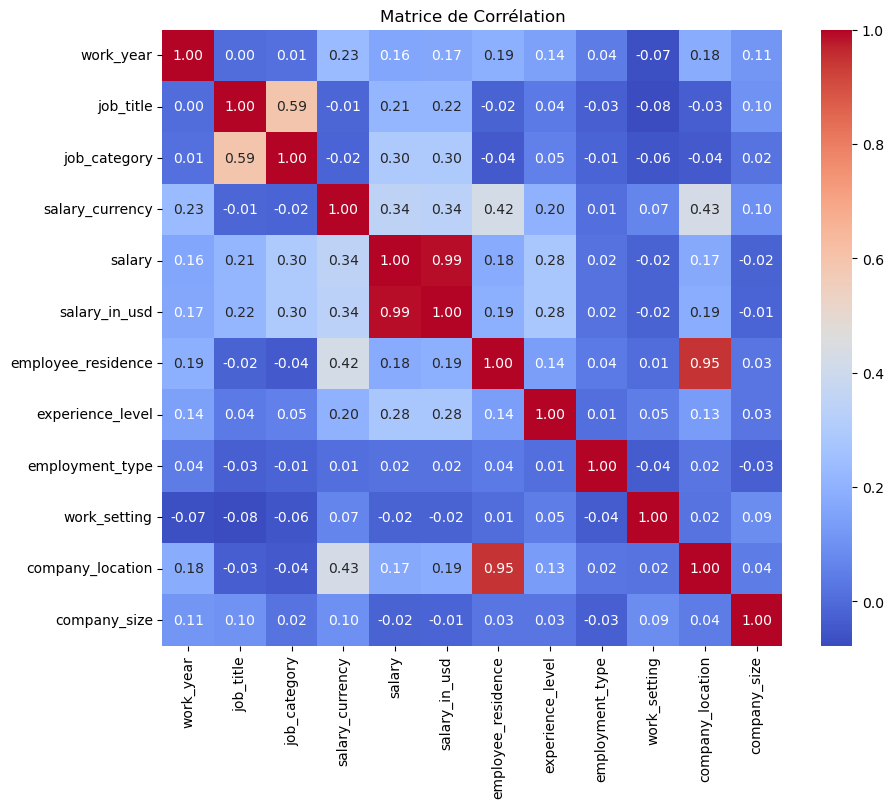

In [19]:
correlation_matrix = df.corr()

# Créer une figure
plt.figure(figsize=(10, 8))

# Dessiner la heatmap de la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Ajouter un titre
plt.title('Matrice de Corrélation')

# save the figure
plt.savefig('correlation_matrix.png')

# Afficher la figure
plt.show()

In [20]:
correlation_matrix

work_year  job_title  job_category  salary_currency  \
work_year            1.000000   0.003608      0.010970         0.230757   
job_title            0.003608   1.000000      0.593290        -0.011041   
job_category         0.010970   0.593290      1.000000        -0.017281   
salary_currency      0.230757  -0.011041     -0.017281         1.000000   
salary               0.160708   0.214366      0.295278         0.344997   
salary_in_usd        0.166003   0.215162      0.295061         0.337682   
employee_residence   0.189958  -0.022267     -0.043204         0.421008   
experience_level     0.144390   0.039761      0.053191         0.201939   
employment_type      0.043098  -0.028526     -0.014530         0.006711   
work_setting        -0.068513  -0.077514     -0.055707         0.069794   
company_location     0.180560  -0.031311     -0.042622         0.426397   
company_size         0.112634   0.102182      0.022919         0.098621   

                      salary  salary_in_usd  employee_residence  \
work_year           0.160708       0.166003            0.189958   
job_title           0.214366       0.215162           -0.022267   
job_category        0.295278       0.295061           -0.043204   
salary_currency     0.344997       0.337682            0.421008   
salary              1.000000       0.991309            0.178856   
salary_in_usd       0.991309       1.000000            0.194304   
employee_residence  0.178856       0.194304            1.000000   
experience_level    0.281549       0.281472            0.138305   
employment_type     0.018723       0.015168            0.036577   
work_setting       -0.019304      -0.021230            0.006125   
company_location    0.171003       0.187459            0.948685   
company_size       -0.021408      -0.014439            0.025560   

                    experience_level  employment_type  work_setting  \
work_year                   0.144390         0.043098     -0.068513   
job_title                   0.039761        -0.028526     -0.077514   
job_category                0.053191        -0.014530     -0.055707   
salary_currency             0.201939         0.006711      0.069794   
salary                      0.281549         0.018723     -0.019304   
salary_in_usd               0.281472         0.015168     -0.021230   
employee_residence          0.138305         0.036577      0.006125   
experience_level            1.000000         0.007479      0.048659   
employment_type             0.007479         1.000000     -0.036084   
work_setting                0.048659        -0.036084      1.000000   
company_location            0.131302         0.023552      0.020762   
company_size                0.027679        -0.027345      0.088940   

                    company_location  company_size  
work_year                   0.180560      0.112634  
job_title                  -0.031311      0.102182  
job_category               -0.042622      0.022919  
salary_currency             0.426397      0.098621  
salary                      0.171003     -0.021408  
salary_in_usd               0.187459     -0.014439  
employee_residence          0.948685      0.025560  
experience_level            0.131302      0.027679  
employment_type             0.023552     -0.027345  
work_setting                0.020762      0.088940  
company_location            1.000000      0.041501  
company_size                0.041501      1.000000

In [21]:
# Diviser les données en ensembles d'entraînement et de test
X = df.drop(['salary_in_usd'], axis=1)  # Features
y = df[['salary_in_usd']]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

X.columns.tolist()

['work_year',
 'job_title',
 'job_category',
 'salary_currency',
 'salary',
 'employee_residence',
 'experience_level',
 'employment_type',
 'work_setting',
 'company_location',
 'company_size']

In [22]:
y.shape

(9355, 1)

In [23]:
X_train.shape

(6080, 11)

In [24]:
X_test.shape

(3275, 11)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialiser les modèles pour chaque colonne cible
models_salary_in_usd = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
}

# Entraîner et évaluer chaque modèle pour la colonne 'salary_in_usd'
for model_name, model in models_salary_in_usd.items():
    print(f"Training {model_name} for 'salary_in_usd' column...")
    model.fit(X_train, y_train['salary_in_usd'])
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test['salary_in_usd'], y_pred)
    mae = mean_absolute_error(y_test['salary_in_usd'], y_pred)
    r2 = r2_score(y_test['salary_in_usd'], y_pred)
    print(f"{model_name} - MSE: {mse}, MAE: {mae}, R²: {r2}")

Training Linear Regression for 'salary_in_usd' column...
Linear Regression - MSE: 70473286.22175899, MAE: 2124.100382028977, R²: 0.9824978843425413
Training Random Forest for 'salary_in_usd' column...
Random Forest - MSE: 64873163.47798608, MAE: 668.704158778626, R²: 0.9838886807877227
Training Gradient Boosting for 'salary_in_usd' column...
Gradient Boosting - MSE: 26405543.265207127, MAE: 1078.6196394163762, R²: 0.9934421552193349


In [26]:
# predict the salary

correlation_matrix

work_year  job_title  job_category  salary_currency  \
work_year            1.000000   0.003608      0.010970         0.230757   
job_title            0.003608   1.000000      0.593290        -0.011041   
job_category         0.010970   0.593290      1.000000        -0.017281   
salary_currency      0.230757  -0.011041     -0.017281         1.000000   
salary               0.160708   0.214366      0.295278         0.344997   
salary_in_usd        0.166003   0.215162      0.295061         0.337682   
employee_residence   0.189958  -0.022267     -0.043204         0.421008   
experience_level     0.144390   0.039761      0.053191         0.201939   
employment_type      0.043098  -0.028526     -0.014530         0.006711   
work_setting        -0.068513  -0.077514     -0.055707         0.069794   
company_location     0.180560  -0.031311     -0.042622         0.426397   
company_size         0.112634   0.102182      0.022919         0.098621   

                      salary  salary_in_usd  employee_residence  \
work_year           0.160708       0.166003            0.189958   
job_title           0.214366       0.215162           -0.022267   
job_category        0.295278       0.295061           -0.043204   
salary_currency     0.344997       0.337682            0.421008   
salary              1.000000       0.991309            0.178856   
salary_in_usd       0.991309       1.000000            0.194304   
employee_residence  0.178856       0.194304            1.000000   
experience_level    0.281549       0.281472            0.138305   
employment_type     0.018723       0.015168            0.036577   
work_setting       -0.019304      -0.021230            0.006125   
company_location    0.171003       0.187459            0.948685   
company_size       -0.021408      -0.014439            0.025560   

                    experience_level  employment_type  work_setting  \
work_year                   0.144390         0.043098     -0.068513   
job_title                   0.039761        -0.028526     -0.077514   
job_category                0.053191        -0.014530     -0.055707   
salary_currency             0.201939         0.006711      0.069794   
salary                      0.281549         0.018723     -0.019304   
salary_in_usd               0.281472         0.015168     -0.021230   
employee_residence          0.138305         0.036577      0.006125   
experience_level            1.000000         0.007479      0.048659   
employment_type             0.007479         1.000000     -0.036084   
work_setting                0.048659        -0.036084      1.000000   
company_location            0.131302         0.023552      0.020762   
company_size                0.027679        -0.027345      0.088940   

                    company_location  company_size  
work_year                   0.180560      0.112634  
job_title                  -0.031311      0.102182  
job_category               -0.042622      0.022919  
salary_currency             0.426397      0.098621  
salary                      0.171003     -0.021408  
salary_in_usd               0.187459     -0.014439  
employee_residence          0.948685      0.025560  
experience_level            0.131302      0.027679  
employment_type             0.023552     -0.027345  
work_setting                0.020762      0.088940  
company_location            1.000000      0.041501  
company_size                0.041501      1.000000

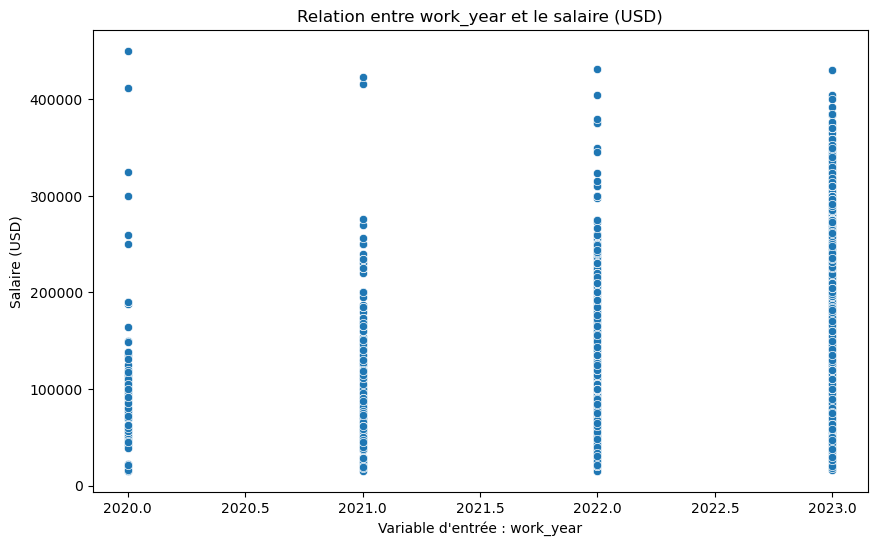

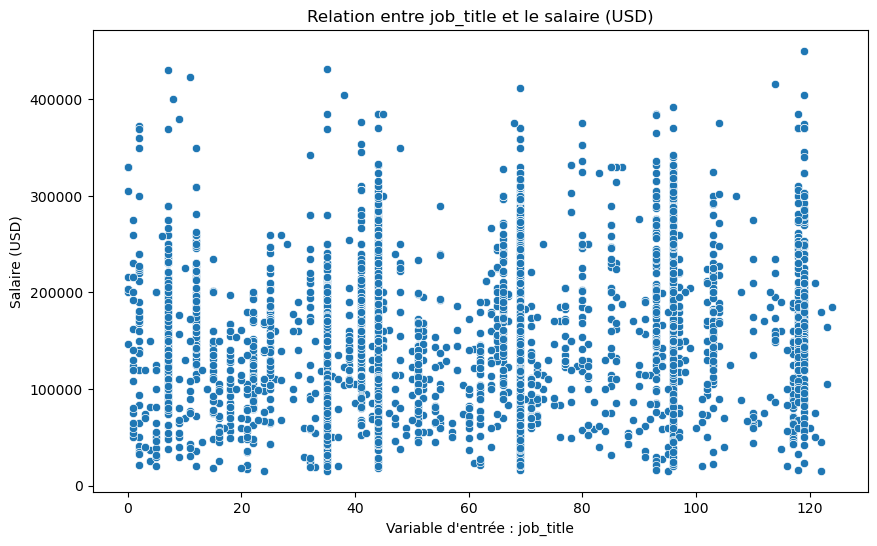

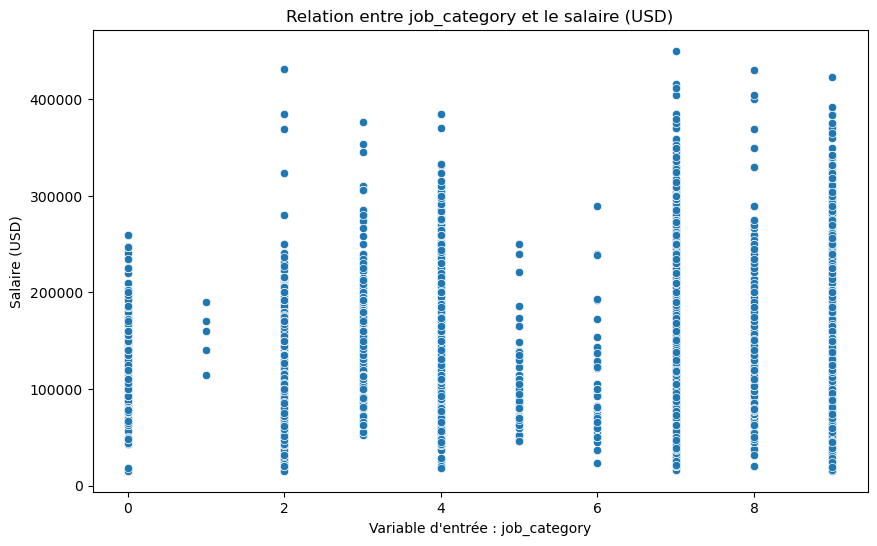

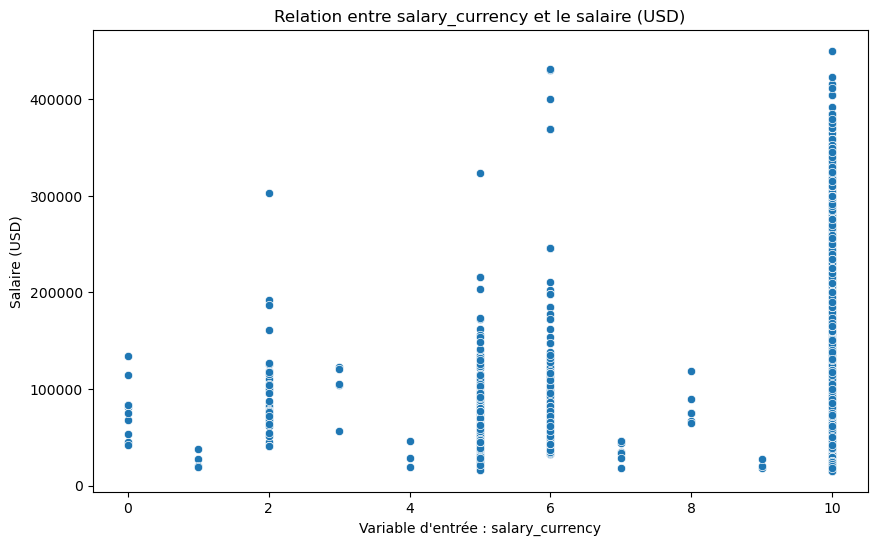

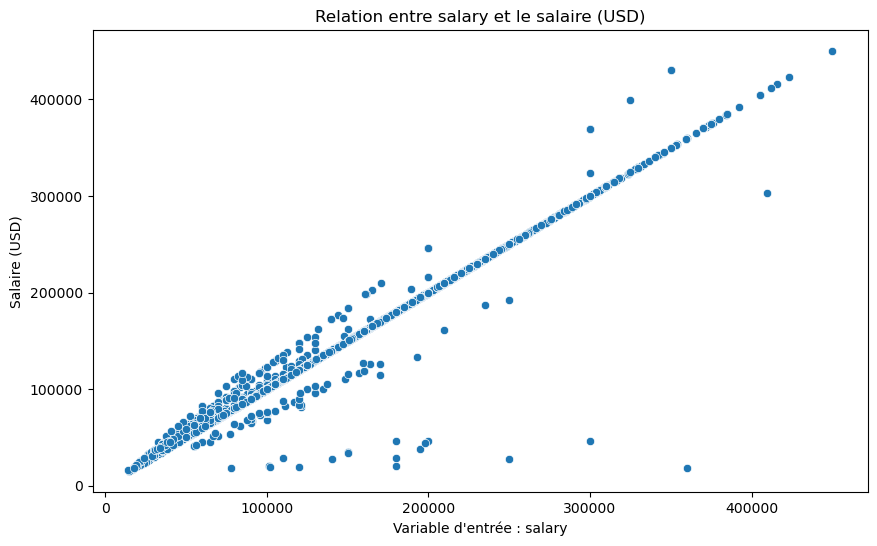

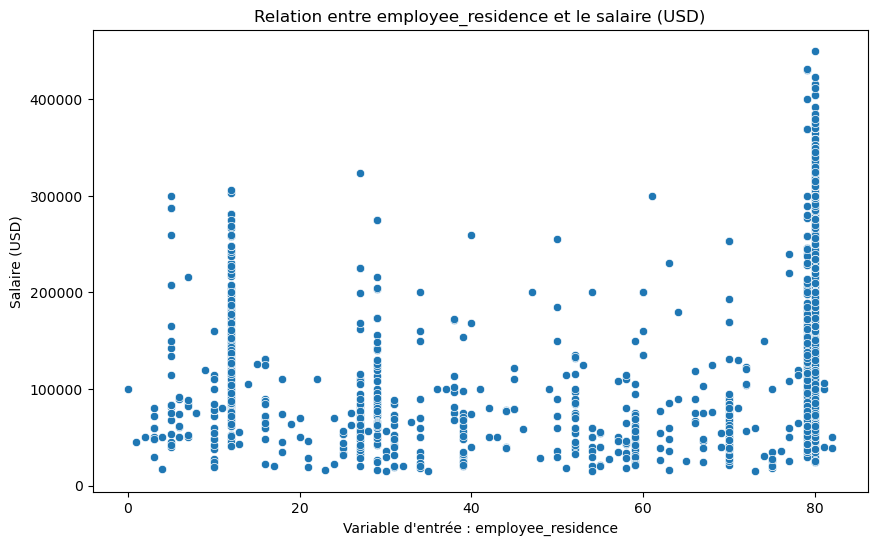

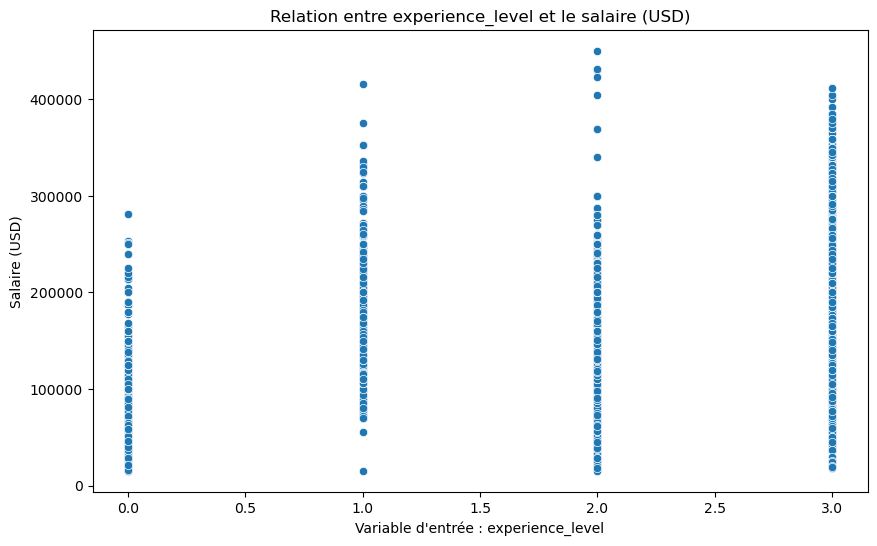

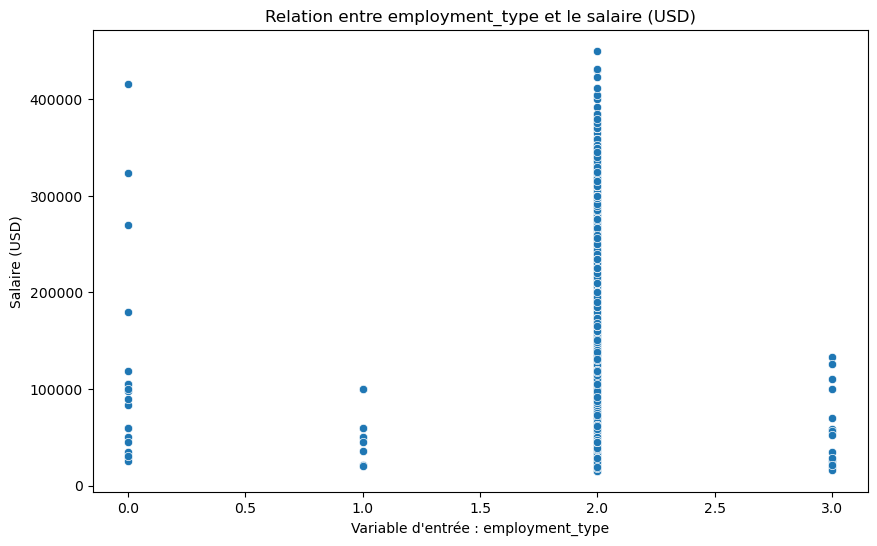

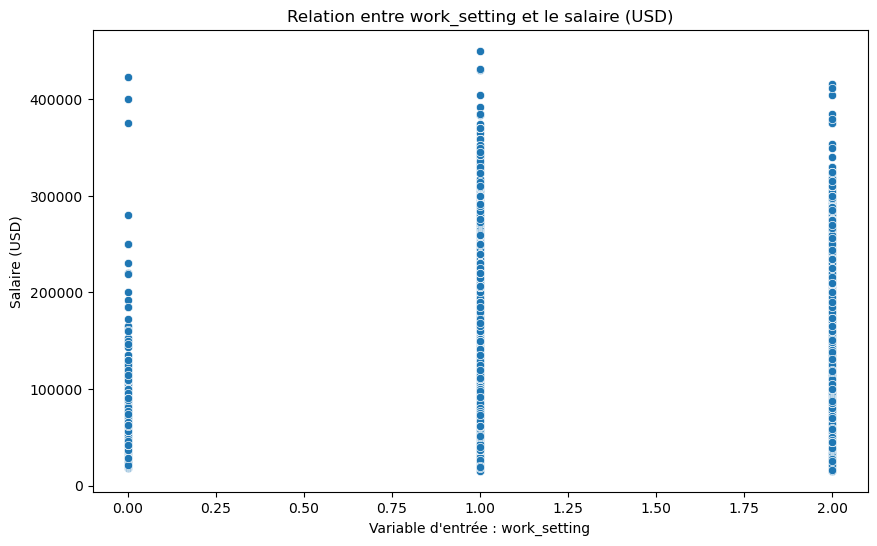

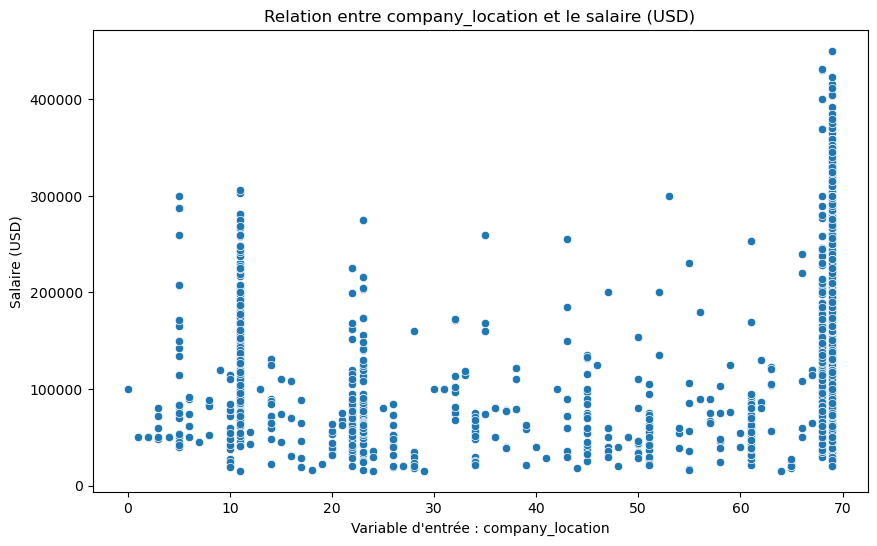

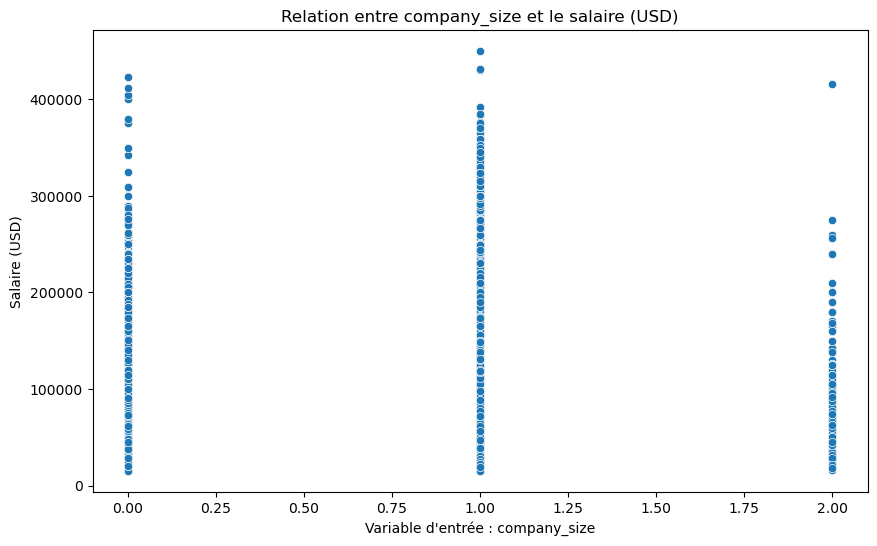

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que vous ayez déjà vos données dans un DataFrame appelé df
# Par exemple, vos variables d'entrée sont dans une liste nommée X et votre variable de sortie est y

# Créer un graphique de dispersion pour chaque variable d'entrée par rapport à la variable de sortie
for variable in X:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=variable, y='salary_in_usd')
    plt.title(f"Relation entre {variable} et le salaire (USD)")
    # save figure
    plt.savefig(f'{variable}_vs_salary_in_usd.png')
    plt.xlabel(f"Variable d'entrée : {variable}")
    plt.ylabel("Salaire (USD)")
    plt.show()
